# Model Testing

## Requirements

In [201]:
# Needed Libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scikit Learn imports
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn import linear_model

In [ ]:
# warnings filter
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [202]:
# Prefix for the calibration data to identify the correct file
prefix = "e2e_test3"

# Load the data from the calibrations csv file
df = pd.read_csv(rf"C:\Users\SITAM MEUR\Desktop\web-eye-tracker-main\web-eye-tracker-main\app\services\calib_validation\csv\data\{prefix}_fixed_train_data.csv")

# Drop the columns that are not needed
df = df.drop(["screen_height", "screen_width"], axis=1)

## Data Exploration

In [203]:
# Shape of the data
df.shape

(720, 6)

In [204]:
# Display the data for the first 5 rows
df.head()

,left_iris_x,left_iris_y,right_iris_x,right_iris_y,point_x,point_y
0,506.971497,282.207611,406.131836,278.658783,100,100
1,518.564636,280.534271,412.582733,279.688538,100,100
2,524.403320,282.937195,417.401550,282.717865,100,100
3,530.841187,287.072388,422.359680,283.891907,100,100
4,534.370300,287.437531,426.682861,285.813660,100,100


In [205]:
# Describe the data to see the statistics
df.describe()

,left_iris_x,left_iris_y,right_iris_x,right_iris_y,point_x,point_y
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,365.496955,328.690510,245.821749,332.613119,768.000000,365.000000
std,171.625348,26.492830,175.055159,26.174230,578.907128,229.656271
min,150.721909,279.046082,32.873291,278.658783,100.000000,100.000000
25%,162.563515,300.021774,40.361696,307.497986,100.000000,100.000000
50%,390.666397,331.088699,259.016006,335.506729,768.000000,365.000000
75%,549.767090,352.795532,437.989388,353.565865,1436.000000,630.000000
max,564.934509,370.810760,451.664612,377.217133,1436.000000,630.000000


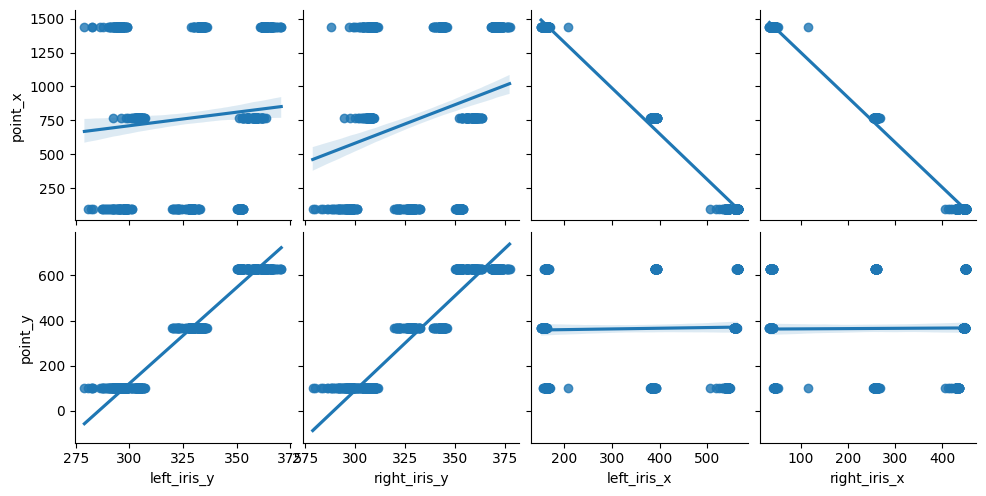

In [206]:
# Regression plot for the data
sns.pairplot(
    df,
    x_vars=["left_iris_y", "right_iris_y", "left_iris_x", "right_iris_x"],
    y_vars=["point_x", "point_y"],
    kind="reg",
)
plt.show()

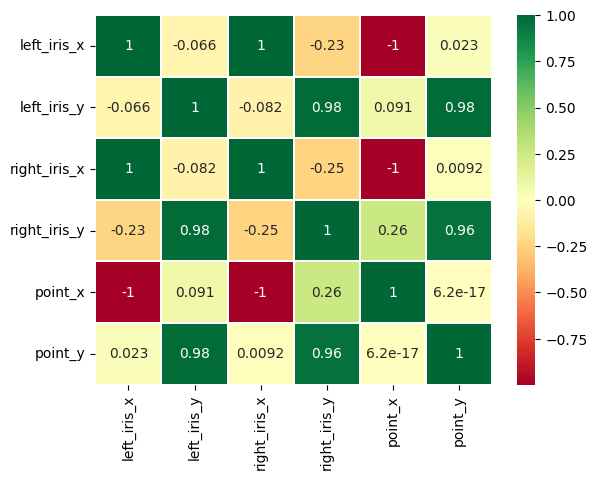

In [207]:
# Heatmap for the correlation of the data
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", linewidths=0.2)
plt.show()

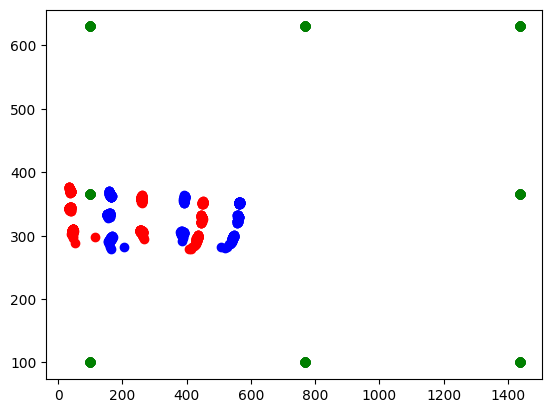

In [208]:
# Plot the data for the left and right iris and the point
plt.scatter(df["left_iris_x"], df["left_iris_y"], color="blue")
plt.scatter(df["right_iris_x"], df["right_iris_y"], color="red")
plt.scatter(df["point_x"], df["point_y"], color="green")
plt.show()

## Model Training

In [209]:
# Left iris X and right iris X
X_x = df[["left_iris_x", "right_iris_x"]]
X_y = df["point_x"]

In [210]:
# Transform the data by standardizing it
sc = StandardScaler()
X_x = sc.fit_transform(X_x)

In [211]:
# Display the data for the first 5 rows after standardizing
X_x[:5]

array([[0.82489499, 0.91640561],
       [0.89249106, 0.95328188],
       [0.92653465, 0.98082844],
       [0.96407189, 1.00917137],
       [0.98464908, 1.03388465]])

In [212]:
# Display first 5 rows
X_y[:5]

0    100
1    100
2    100
3    100
4    100
Name: point_x, dtype: int64

In [213]:
# Split the data into training and testing sets
X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(
    X_x, X_y, test_size=0.2, random_state=42
)

In [214]:
# Create a ElasticNet regression model and fit the data
model_x = make_pipeline(
    PolynomialFeatures(2), linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5)
)
model_x.fit(X_train_x, y_train_x)

# Predict the data and calculate the r2 score
y_pred_x = model_x.predict(X_test_x)
r2_score(y_test_x, y_pred_x)

0.9523077664938892

In [215]:
# Look at the predicted data
y_pred_x

array([ 747.02218614,  737.42924978,  279.88344694,  230.54044098,
       1309.30767492,  278.41914017,  277.03634549,  238.78249632,
        741.60500798,  729.82005295, 1309.11697423,  725.7708785 ,
        283.22159251,  245.85116235,  729.26935504,  748.71908107,
        273.70202144, 1313.88438104,  232.14734217,  229.64929264,
        726.55354494,  728.91464129,  285.18215641, 1315.61023111,
       1307.45528605,  747.59055299,  229.28881811,  231.43617598,
        235.44182376,  239.5300476 ,  730.80986415,  729.70893204,
        747.7969688 ,  731.19087   , 1331.1203785 , 1322.01493109,
       1307.47001122, 1330.88422484, 1327.71129565, 1307.77941948,
        739.05924954,  240.28238704,  280.71725394, 1312.38413871,
        729.1727232 ,  277.70446184,  749.85190945, 1318.43210968,
       1319.06845813,  278.30397737, 1304.40871971, 1318.17948896,
        723.57129236, 1316.16997109,  236.52877322,  738.93216736,
        231.27588717,  229.8455486 ,  277.78279306,  747.85284

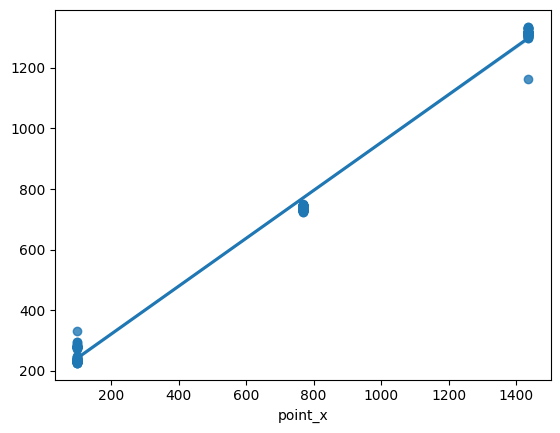

In [216]:
# Plot the data
sns.regplot(x=y_test_x, y=y_pred_x)
plt.show()

In [217]:
# Left iris Y and right iris Y
X_y = df[["left_iris_y", "right_iris_y"]]
y_y = df["point_y"]

In [218]:
# Transform the data by standardizing it
sc = StandardScaler()
X_y = sc.fit_transform(X_y)

In [219]:
# Display the data for the first 5 rows after standardizing
X_y[:5]

array([[-1.75576606, -2.06278627],
       [-1.81897195, -2.02341661],
       [-1.728208  , -1.90759914],
       [-1.57201225, -1.86271308],
       [-1.55821997, -1.78924048]])

In [220]:
# Display first 5 rows
y_y[:5]

0    100
1    100
2    100
3    100
4    100
Name: point_y, dtype: int64

In [221]:
# Split the data into training and testing sets
X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(
    X_y, y_y, test_size=0.2, random_state=42
)

In [222]:
# Create a ElasticNet regression model and fit the data
model_y = make_pipeline(
    PolynomialFeatures(2), linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5)
)
model_y.fit(X_train_y, y_train_y)

# Predict the data and calculate the r2 score
y_pred_y = model_y.predict(X_test_y)
r2_score(y_test_y, y_pred_y)

0.901287618717771

In [223]:
# Look at the predicted data
y_pred_y

array([201.74917125, 185.23221683, 142.1986381 , 516.90506635,
       108.01383572, 154.01956202, 151.01190587, 358.19497598,
       198.31700416, 561.12947779, 595.78324198, 582.5134014 ,
       134.56978357, 309.5565218 , 561.72553749, 202.20531574,
       160.62435362, 429.83495112, 512.78998158, 509.84960589,
       584.42561482, 526.94341393, 124.61335133, 606.18542394,
       170.5342504 , 197.639494  , 515.80270602, 513.72590626,
       342.39977669, 350.20572588, 554.89136981, 518.00374096,
       193.77385374, 538.15755241, 411.01714275, 647.11559949,
       602.58028061, 422.54014636, 416.90526083, 165.82479817,
       190.83257017, 349.00574088, 139.89150645, 608.86756376,
       551.41432302, 144.82192418, 203.92553112, 426.51546804,
       628.71531415, 149.52645348, 186.22496506, 609.96307602,
       568.49275178, 393.84477015, 354.4503328 , 202.96107636,
       513.1383704 , 509.42505411, 153.65983788, 202.78872567,
       183.92755529,  90.20019376, 149.55184482, 560.57

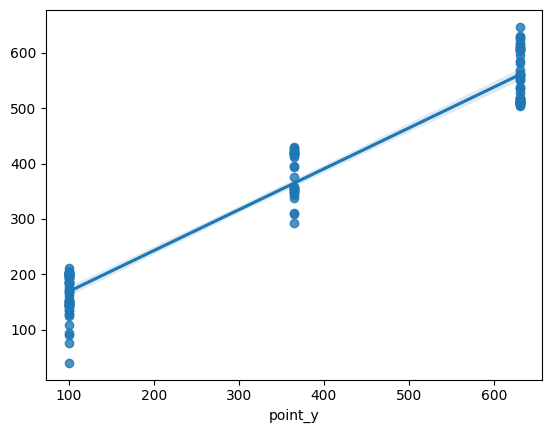

In [224]:
# Plot the data
sns.regplot(x=y_test_y, y=y_pred_y)
plt.show()

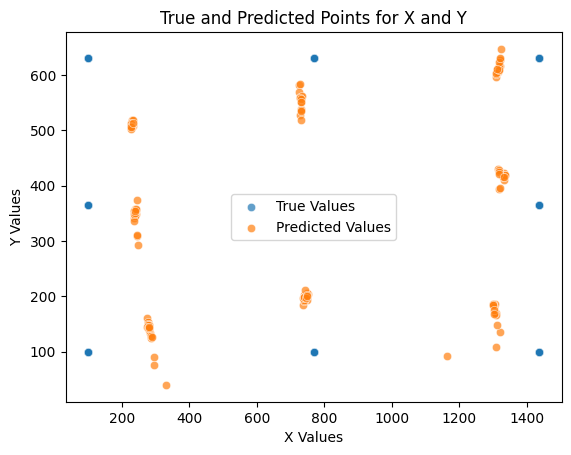

In [225]:
# Data dictionary for the true and predicted values
data = {
    "True X": y_test_x,
    "Predicted X": y_pred_x,
    "True Y": y_test_y,
    "Predicted Y": y_pred_y,
}

# Scatter plot for the true and predicted values
sns.scatterplot(x="True X", y="True Y", data=data, label="True Values", alpha=0.7)
sns.scatterplot(
    x="Predicted X", y="Predicted Y", data=data, label="Predicted Values", alpha=0.7
)

# Plot title and labels
plt.title("True and Predicted Points for X and Y")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.legend()

# Show the plot
plt.show()

In [226]:
# Create a new dataframe with the True X and Y values
df_data = pd.DataFrame(data)
df_data["True XY"] = list(zip(df_data["True X"], df_data["True Y"]))

In [227]:
# Display the data
df_data

,True X,Predicted X,True Y,Predicted Y,True XY
340,768,747.022186,100,201.749171,"(768, 100)"
290,768,737.429250,100,185.232217,"(768, 100)"
54,100,279.883447,100,142.198638,"(100, 100)"
198,100,230.540441,630,516.905066,"(100, 630)"
453,1436,1309.307675,100,108.013836,"(1436, 100)"
...,...,...,...,...,...
164,100,240.519054,365,356.487616,"(100, 365)"
165,100,241.362315,365,358.359525,"(100, 365)"
199,100,231.407176,630,513.829024,"(100, 630)"
132,100,238.197982,365,354.050575,"(100, 365)"


In [228]:
# Only 5 rows
df_data.head()

,True X,Predicted X,True Y,Predicted Y,True XY
340,768,747.022186,100,201.749171,"(768, 100)"
290,768,737.429250,100,185.232217,"(768, 100)"
54,100,279.883447,100,142.198638,"(100, 100)"
198,100,230.540441,630,516.905066,"(100, 630)"
453,1436,1309.307675,100,108.013836,"(1436, 100)"


In [229]:
# Shape of the data
df_data.shape

(144, 5)

In [230]:
# Let's filter the data to remove the unwanted values
df_data = df_data[(df_data["Predicted X"] >= 0) & (df_data["Predicted Y"] >= 0)]
df_data = df_data[
    (abs(df_data["Predicted X"] - df_data["True X"]) <= 100)
    & (abs(df_data["Predicted Y"] - df_data["True Y"]) <= 100)
]

In [231]:
# Shape of the data
df_data.shape

(27, 5)

In [232]:
# Precision is calculated via the Root Mean Square from the
# successive data points [in degrees of visual angle θi between
# successive (x1,y1) to (xi+1, yi+1) samples], both for each eye
# individually and as a mean from the two

# Another option to describe the variation in the data is to
# measure the standard deviation of the data set, equivalent
# to the RMS normalized by the mean


def func_x(group):
    """
    Calculate the root mean square error between the predicted X and true X values.

    Args:
        group (pandas.DataFrame): A DataFrame containing the predicted X and true X values.

    Returns:
        float: The root mean square error between the predicted X and true X values.
    """
    return np.sqrt(np.sum(np.square([group["Predicted X"], group["True X"]])))


def func_y(group):
    """
    Calculate the root mean square error between the predicted Y values and the true Y values.

    Args:
        group (pandas.DataFrame): A DataFrame containing the predicted Y values and the true Y values.

    Returns:
        float: The root mean square error between the predicted Y values and the true Y values.
    """
    return np.sqrt(np.sum(np.square([group["Predicted Y"], group["True Y"]])))


# Calculate the precision for the X and Y values
precision_x = df_data.groupby("True XY").apply(func_x)
precision_y = df_data.groupby("True XY").apply(func_y)

# Calculate the mean precision for the X and Y values
precision_xy = (precision_x + precision_y) / 2
precision_xy = precision_xy / np.mean(precision_xy)

print("mean", precision_xy)

mean True XY
(768, 100)    0.754771
(768, 630)    1.245229
dtype: float64


C:\Users\SITAM MEUR\AppData\Local\Temp\ipykernel_26840\3757417304.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  precision_x = df_data.groupby("True XY").apply(func_x)
C:\Users\SITAM MEUR\AppData\Local\Temp\ipykernel_26840\3757417304.py:41: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  precision_y = df_data.groupby("True XY").apply(func_y)


In [233]:
# Create a dictionary to store the data
data = {}

# Iterate over df_data to get the data
for index, row in df_data.iterrows():

    # Get the outer and inner keys
    outer_key = str(row["True X"])
    inner_key = str(row["True Y"])

    # If the outer key is not in the data, add it
    if outer_key not in data:
        data[outer_key] = {}

    # Add the data to the dictionary
    data[outer_key][inner_key] = {
        "predicted_x": df_data[
            (df_data["True X"] == row["True X"]) & (df_data["True Y"] == row["True Y"])
        ]["Predicted X"].values.tolist(),
        "predicted_y": df_data[
            (df_data["True X"] == row["True X"]) & (df_data["True Y"] == row["True Y"])
        ]["Predicted Y"].values.tolist(),
        "PrecisionSD": precision_xy[(row["True X"], row["True Y"])],
    }

In [234]:
# Create an numpy array to store the transposed data
data = np.array([y_pred_x, y_pred_y]).T

In [235]:
# Shape of the data
data.shape

(144, 2)

In [236]:
# Create a KMeans model with 8 clusters
model = KMeans(n_clusters=8, n_init="auto", init="k-means++")

# Fit the data to the model
y_kmeans = model.fit_predict(data)

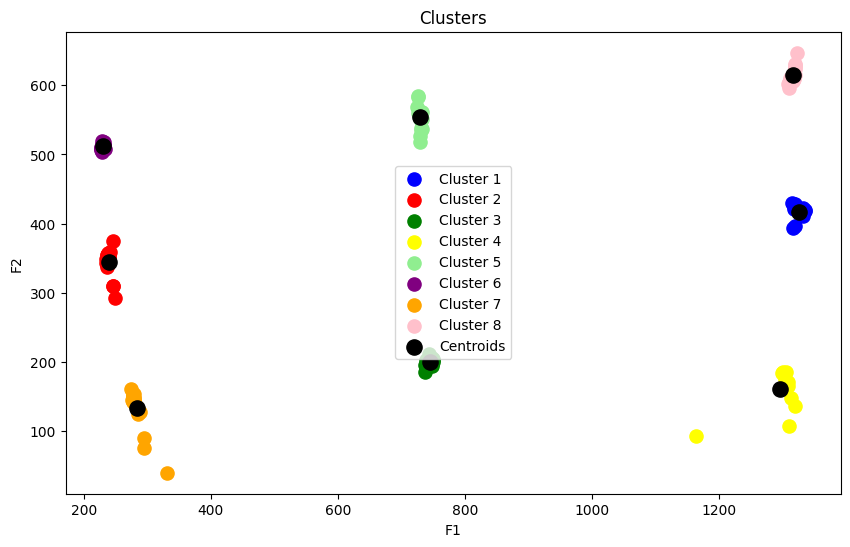

In [237]:
# Plot figure size
plt.figure(figsize=(10, 6))

# Scatter plot for the data
plt.scatter(
    data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s=90, c="blue", label="Cluster 1"
)
plt.scatter(
    data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s=90, c="red", label="Cluster 2"
)
plt.scatter(
    data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s=90, c="green", label="Cluster 3"
)
plt.scatter(
    data[y_kmeans == 3, 0], data[y_kmeans == 3, 1], s=90, c="yellow", label="Cluster 4"
)
plt.scatter(
    data[y_kmeans == 4, 0], data[y_kmeans == 4, 1], s=90, c="lightgreen", label="Cluster 5"
)
plt.scatter(
    data[y_kmeans == 5, 0], data[y_kmeans == 5, 1], s=90, c="purple", label="Cluster 6"
)
plt.scatter(
    data[y_kmeans == 6, 0], data[y_kmeans == 6, 1], s=90, c="orange", label="Cluster 7"
)
plt.scatter(
    data[y_kmeans == 7, 0], data[y_kmeans == 7, 1], s=90, c="pink", label="Cluster 8"
)
plt.scatter(
    model.cluster_centers_[:, 0],
    model.cluster_centers_[:, 1],
    s=120,
    c="black",
    label="Centroids",
)

# Plot title and labels
plt.title("Clusters")

plt.xlabel("F1")
plt.ylabel("F2")

plt.legend()

# Show the plot
plt.show()

## Testing

In [238]:
def plot(ax, y_test_x, y_pred_x, y_test_y, y_pred_y, title=None):
    """
    Plots the true and predicted points for X and Y coordinates.

    Args:
        - ax (matplotlib.axes.Axes): The axes object to plot on.
        - y_test_x (list or numpy.ndarray): The true X coordinates.
        - y_pred_x (list or numpy.ndarray): The predicted X coordinates.
        - y_test_y (list or numpy.ndarray): The true Y coordinates.
        - y_pred_y (list or numpy.ndarray): The predicted Y coordinates.
        - title (str, optional): The title of the plot. Defaults to None.

    Returns: None
    """
    # Convert the data to numpy arrays
    y_test_x = np.array(y_test_x)
    y_test_y = np.array(y_test_y)

    # True points as a list of tuples
    true_points = [(y_test_x[i], y_test_y[i]) for i in range(len(y_test_x))]

    # Define the error range
    error_range = 0.05

    # Create a DataFrame with the true and predicted values
    data = {
        "True X": y_test_x,
        "Predicted X": y_pred_x,
        "True Y": y_test_y,
        "Predicted Y": y_pred_y,
    }

    # Plot the true and predicted points for X and Y
    sns.scatterplot(
        x="True X",
        y="True Y",
        data=data,
        label="True Values",
        alpha=0.7,
        ax=ax,
        color="red",
    )
    sns.scatterplot(
        x="Predicted X",
        y="Predicted Y",
        data=data,
        label="Predicted Values",
        alpha=0.7,
        ax=ax,
        color="green",
    )

    # Calculate the circle radius
    circle_radius = (
        error_range
        * (max(y_test_x) - min(y_test_x) + max(y_test_y) - min(y_test_y))
        / 2
    )

    # Iterate over the true points
    for true_x, true_y in true_points:

        # Get the predicted values within the error range
        x_within_range = [
            y_pred_x[j]
            for j in range(len(y_test_x))
            if abs(y_test_x[j] - true_x) <= error_range
        ]
        y_within_range = [
            y_pred_y[j]
            for j in range(len(y_test_y))
            if abs(y_test_y[j] - true_y) <= error_range
        ]

        # If there are more than one predicted values within the error range
        if len(x_within_range) > 1 and len(y_within_range) > 1:

            # Calculate the combined predictions and true values
            combined_predictions = x_within_range + y_within_range
            combined_true = [true_x] * len(x_within_range) + [true_y] * len(
                y_within_range
            )

            # Calculate the R2 score and MAE for the combined values
            r2_combined = r2_score(combined_true, combined_predictions)
            mae_combined = mean_absolute_error(combined_true, combined_predictions)

            # Create a circle patch
            circle = plt.Circle(
                (true_x, true_y), circle_radius, color="yellow", fill=False
            )

            # Add the circle to the plot
            ax.add_patch(circle)
            ax.text(
                true_x + 0.1,
                true_y + 0.1,
                f"R2={r2_combined:.2f}\nMAE={mae_combined:.2f}",
                fontsize=8,
                color="blue",
            )

    # Set the title and legend
    title = title if title else "True and Predicted Points for X and Y"
    ax.set_title(title)
    ax.legend()

In [239]:
def analysis(df, ax=None, title=None):
    """
    Perform analysis on the given DataFrame.

    Args:
        - df (DataFrame): The input DataFrame containing the data for analysis.
        - ax (AxesSubplot, optional): The subplot to plot the analysis results on.
        - title (str, optional): The title of the plot.

    Returns: None
    """
    # Initialize the StandardScaler and ElasticNet model
    sc = StandardScaler()
    model = make_pipeline(PolynomialFeatures(2), linear_model.ElasticNet())

    # Define the parameter grid for GridSearchCV
    param_grid = {
        "elasticnet__alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
        "elasticnet__l1_ratio": [0, 0.01, 0.2, 0.5, 0.8, 1],
    }

    # Set the scoring metrics for GridSearchCV to r2_score and mean_absolute_error
    scoring = {
        "r2": make_scorer(r2_score),
        "mae": make_scorer(mean_absolute_error),
    }

    # Initialize GridSearchCV with the model and parameter grid
    grid_search = GridSearchCV(
        model, param_grid, cv=5, scoring=scoring, refit="r2", return_train_score=True
    )

    """For Left Iris X and Right Iris X model training and testing"""
    # Left iris X and right iris X
    X_x = df[["left_iris_x", "right_iris_x"]]
    y_x = df["point_x"]

    # Transform the data by standardizing it
    X_x = sc.fit_transform(X_x)

    # Split the data into training and testing sets
    X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(
        X_x, y_x, test_size=0.2, random_state=42
    )

    # Fit the model to the training data for X using GridSearchCV
    grid_search.fit(X_train_x, y_train_x)

    # Use the best model to predict the values and calculate the R2 score
    best_model_x = grid_search.best_estimator_
    y_pred_x = best_model_x.predict(X_test_x)
    r2_score_x = r2_score(y_test_x, y_pred_x)
    print("-------------------MODEL RESULT FOR X------------------")
    print(
        f'Best alpha for X: {grid_search.best_params_["elasticnet__alpha"]}, Best l1_ratio for X: {grid_search.best_params_["elasticnet__l1_ratio"]}, R2 score : {r2_score_x}'
    )
    print("-------------------------------------------------------")

    """For Left Iris Y and Right Iris Y model training and testing"""
    # Left iris Y and right iris Y
    X_y = df[["left_iris_y", "right_iris_y"]]
    y_y = df["point_y"]

    # Transform the data by standardizing it
    X_y = sc.fit_transform(X_y)

    # Split the data into training and testing sets
    X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(
        X_y, y_y, test_size=0.2, random_state=42
    )

    # Fit the model to the training data for Y using GridSearchCV
    grid_search.fit(X_train_y, y_train_y)

    # Use the best model to predict the values and calculate the R2 score
    best_model_y = grid_search.best_estimator_
    y_pred_y = best_model_y.predict(X_test_y)
    r2_score_y = r2_score(y_test_y, y_pred_y)
    print("-------------------MODEL RESULT FOR Y------------------")
    print(
        f'Best alpha for Y: {grid_search.best_params_["elasticnet__alpha"]}, Best l1_ratio for Y: {grid_search.best_params_["elasticnet__l1_ratio"]}, R2 score : {r2_score_y}'
    )
    print("-------------------------------------------------------")

    # Plot the true and predicted points for X and Y
    plot(ax, y_test_x, y_pred_x, y_test_y, y_pred_y, title)

c:\Users\SITAM MEUR\Desktop\web-eye-tracker-main\web-eye-tracker-main\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.064e+05, tolerance: 1.533e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\SITAM MEUR\Desktop\web-eye-tracker-main\web-eye-tracker-main\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.077e+05, tolerance: 1.601e+04 Linear regression models with null weight for the l1

-------------------MODEL RESULT FOR X------------------
Best alpha for X: 0.001, Best l1_ratio for X: 0.8, R2 score : 0.9982355264998006
-------------------------------------------------------


c:\Users\SITAM MEUR\Desktop\web-eye-tracker-main\web-eye-tracker-main\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.684e+05, tolerance: 2.385e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\SITAM MEUR\Desktop\web-eye-tracker-main\web-eye-tracker-main\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.607e+05, tolerance: 2.407e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\SITAM MEUR\Desktop\web-eye-tracker-main\web-eye-tracker-main\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You

-------------------MODEL RESULT FOR Y------------------
Best alpha for Y: 0.0, Best l1_ratio for Y: 0, R2 score : 0.9768205711537207
-------------------------------------------------------


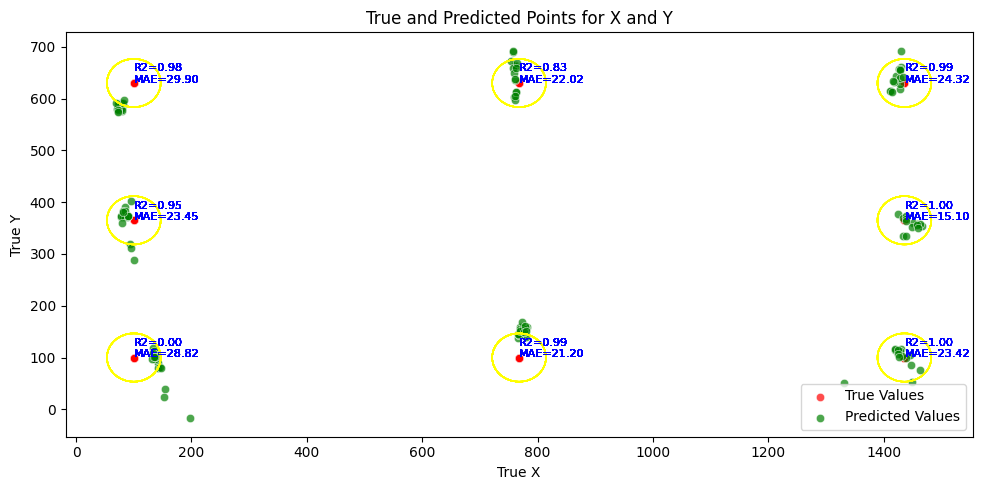

In [240]:
# Load the data from the calibrations csv file
df = pd.read_csv(rf"C:\Users\SITAM MEUR\Desktop\web-eye-tracker-main\web-eye-tracker-main\app\services\calib_validation\csv\data\{prefix}_fixed_train_data.csv")
df = df.drop(["screen_height", "screen_width"], axis=1)

# Create a list of DataFrames
df_list = [df]

# num_rows = len(df_list) // 2 + len(df_list) % 2
# num_cols = min(2, len(df_list))

# Calculate the number of rows and columns
num_rows = len(df_list)
num_cols = 1

# Create a figure and axes
fig_height = 5 * num_rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, fig_height), squeeze=False)

# Iterate over the DataFrames
for i, df in enumerate(df_list):

    # row_idx = i // num_cols
    # col_idx = i % num_cols

    row_idx = i
    col_idx = 0

    ax = axes[row_idx, col_idx]

    # Perform the analysis
    analysis(df, ax)

# Plot the data
plt.tight_layout()
plt.show()